In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# 01b: A Weather Dataset

**Action:** 
test your program on the 1901 data: the maximum recorded temperature from your program should be 31.7°C.


In [ ]:
import gzip
import fileinput
import sys

file_name = sys.argv[1]
ncdc_dat = gzip.open(file_name)
all_yrs = []
yr_temps = []
qual_codes = []
for line in ncdc_dat:
	file_name = line.strip()
	yr = file_name[15:19]
	all_yrs.append(yr)
	yr_temp = float(file_name[87:92])
	print "%s\t%s" % (yr, yr_temp)
	yr_temps.append(yr_temp)
	qual_code = file_name[92]
	qual_codes.append(qual_code)
myInt = 100
divided_list = [x / myInt for x in yr_temps]	
print("The max temp for the year was",sorted(divided_list,reverse=True)[1])

In [ ]:
# Example of output (does not include output in its entirety because it's too large)

1950	0.0
1950	17.0
1950	17.0
1950	22.0
1950	28.0
1950	17.0
('The max temp for the year was', 99.989999999999995)

The above code takes the filepath to a zipped ncdc year file, sorts through each file for the year, each temperature, and the quality code.  It prints the year, a tab character, and the corresponding temp.  It also adds each data value into each respective list.  Then, it divides the temperatures by 100, sorts the list, and prints the maximum temperature reached for the year.  

This is a simple code that gets the job done, and I improve upon it further along in the NCDC data set exploration.  I worked with lists because I had more experience with list manipulation that I did with other types of python analysis techniques. This was the first maximum temperature code I wrote, and I did not have as deep an understanding of the sys module and its advantages.

**Action:** Given that each data file is around 20kB in size, calculate how many data files there are in the whole dataset.

The full size of the dataset is around 600 GB, or 600,000,000 kB. So, 600,000,000 / 20 = 30,000,000 kB.  This is not likely to be terribly accurate, however, given the continous growth of the size of the files over time.

**Action:** Write a program (in Python or other suitable language: R is not recommended for this task because its FTP support is poor) which takes a single year as argument, and retrieves all the ISD data files from the NOAA’s FTP server for that year. You may wish to think about how to make your program robust to temporary network failures of various kinds. Action 3: test this program by using it to get the ISD data files for the year 1902; action: test your data processing program by rerunning it on the now-larger dataset; the output from your program should resemble:

1901    317
1902    244

In [ ]:
#! /usr/bin/python

# Given on BDA learn.gold page

from ftplib import FTP
import sys
import os

# Check if a "raw" folder exists, if not, make one, and change to that directory
if not os.path.exists('raw/' + sys.argv[1]):
	os.makedirs('raw/' + sys.argv[1])
os.chdir('raw/' + sys.argv[1])

# Make FTP connection to noaa
ncdc = FTP('ftp.ncdc.noaa.gov')
ncdc.login('anonymous','c.rhodes@gold.ac.uk')

# Change to isd data directory
ncdc.cwd('pub/data/noaa/' + sys.argv[1])
for file in ncdc.nlst():
	if os.path.exists(file) and os.path.getsize(file) == 0:
		os.remove(file) # remove empty files
	if not os.path.exists(file):
		ncdc.retrbinary('RETR ' + file, open(file, 'wb').write) # Retrieve all other files
ncdc.quit() # Close connection

os.chdir('../..')
# Pipeline desc
os.system('zcat raw/' + sys.argv[1] + '/*.gz | gzip > ' + sys.argv[1] + '.gz')


**Action:** use your program to download ISD data from the years 1903 to 1930. You may wish to put data files corresponding to separate years into separate directories named for each year; this is not necessary, but may simplify some subsequent steps. Action: based on your download time for this step, the volume of data downloaded, and the total archive size, estimate how long it would take to download the entire dataset.

**Action:** over the course of the week before the next session, download to your home directories on the cluster as much of the dataset as you can. You are encouraged to work on this with your classmates; it is more important that you as a class have access to as much data as possible than any one individual has a large dataset. Can you come up with strategies to help ensure that you have as much data as possible from this dataset available by this time next week? You may wish to use the module’s discussion forum on learn.gold to help coordinate amongst yourselves.

In [ ]:
[cbutl002@dsm1 big_dat]$ for i in $(seq 1931 1934); do python -m cProfile get_year.py $i; done

7097 function calls (7044 primitive calls) in 2.442 CPU seconds 5.3M

9966 function calls (9913 primitive calls) in 3.435 CPU seconds 8.4M

49187 function calls (49134 primitive calls) in 200.119 CPU seconds 9.0M

75694 function calls (75641 primitive calls) in 328.402 CPU seconds 11M



I decided to time each year's pull by using the cProfile module.  This module prints a status marking the total computer processing time spent for each function call.  The above output is a shortened version of the real output I recieved by running the shown command on the cluster.  Its actual output consists of a much more detailed explanation of the processing time, including the total number of function calls per file, the time each took to execute, and the name of the function.  This made the module very easy to work with and perfect for this task.

In [10]:
def trendline(xd, yd, order=1, c='r', alpha=1, Rval=False):
    """Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(xd, yd, order)

    #intercept = coeffs[-1]
    intercept = coeffs[2]
    #slope = coeffs[-2]
    slope = coeffs[1]
    if order == 2: power = coeffs[0]
    else: power = 0

    minxd = np.min(xd)
    maxxd = np.max(xd)

    xl = np.array([minxd, maxxd])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(yd) / len(yd)
    ssreg = np.sum((p(xd) - ybar) ** 2)
    sstot = np.sum((yd - ybar) ** 2)
    Rsqr = ssreg / sstot
    print(Rsqr)
    print("Order \t\t Slope \t Intercept")
    print(coeffs)
    
    if Rval == False:
        #Plot R^2 value
        plt.text(0.8 * maxxd + 0.2 * minxd, 0.8 * np.max(yd) + 0.2 * np.min(yd),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr
    
# Great code I found for plotting the line of best fit.  
# URL: http://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python
# By user "Siyh" on 15/03/2015

This is some great code for fitting trend lines of different orders on StackOverflow.  I didn't want to use the command built-in to matplotlib because it didn't seem to accurately represent the data for the data I gave it. 

0.979431322212
Order 		 Slope 	 Intercept
[ 0.00050418 -0.00936649  0.11939786]


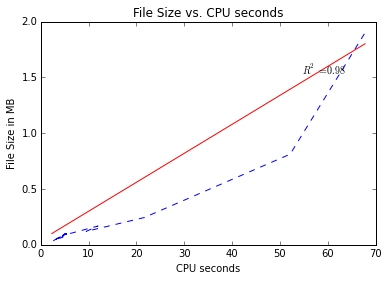

In [12]:
time = [4.776,4.627,4.485, 4.504, 4.491,4.113,3.544, 4.032, 4.696, 4.618,
          4.677, 4.620, 5.180, 5.322, 5.276, 2.286, 5.109, 5.357, 4.617, 5.483,
          5.510, 5.091, 4.647, 4.604, 4.601, 11.949, 9.476, 21.605, 52.128, 67.783]
size = [.072,.072,.072,.072,.068,.060,.060,.072,.084,.084,.084,.084,.100,.100,.100,
          .028,.100,.096,.088,.100,.096,.096,.084,.084,.084,.168,.120,.244,.812,1.9]

plt.plot(time,size,'b--')
plt.axis([0,70,0,2])
plt.xlabel("CPU seconds")
plt.ylabel("File Size in MB")
plt.title("File Size vs. CPU seconds")

#par = np.polyfit(time, size, 1, full=True)

#plt.plot(time, np.poly1d(np.polyfit(time, size, 1))(time))
regline = trendline(time,size,2)

plt.show()

The (red) line of best fit here fits the data plot with ~98% accuracy. The total dataset uncompressed is 600 GB.  The equation of the line of best fit is: y = .1194+.0094x^2. For some reason the slope printed as negative in the code, but obviously it is supposed to be positive, just by eyeballing the graph. Plugging the y value of 600GB, or 600,000MB, we get an approximate 133 hours of processing time for the entire data set.  

Max Temp vs Year Plot: 

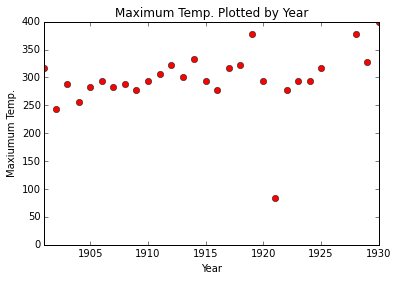

In [16]:
year = [1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 
        1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 
        1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 
        1927, 1928, 1929, 1930,]

max_temp = [317.0,244.0,289.0,256.0,283.0,294.0,283.0,289.0,278.0,294.0,306.0,322.0,300.0,333.0,294.0,
            278.0,317.0,322.0,378.0,294.0,83.0,278.0,294.0,294.0,317.0,489.0,489.0,378.0,328.0,400.0]

plt.plot(year,max_temp,'ro')
plt.axis([1901,1930,0,400])
plt.xlabel("Year")
plt.ylabel("Maxiumum Temp.")
plt.title("Maximum Temp. Plotted by Year")

plt.show()

In recent years, the temperature has been rising steadily.  I thought it would be interesting to compare the first few years of maximum temperatures to the last few years of maximum temperatures. These are the plots I created.  One issue with the maximum temperatures in recent years is that they are not from the NCDC weather data set.  They are taken from wikipedia, which was the only resource I could find listing global maximum temperatures.  The ncdc data was simply too large to analyze, even on the cluster.

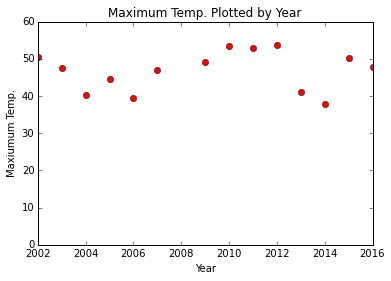

In [6]:
max_temp = [50.6,47.4,40.2,44.7,39.5, 47,49.1, 53.5, 53, 53.6, 41, 37.8, 50.3, 47.7]
year = [2002,2003,2004,2005,2006, 2007,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016]

plt.plot(year,max_temp,'ro')
plt.axis([2002,2016,0,60])
plt.xlabel("Year")
plt.ylabel("Maxiumum Temp.")
plt.title("Maximum Temp. Plotted by Year")

plt.show()

What is interesting about these two plots is that there appears to be a sinosoidal trend going on, as opposed to a more directly upwards trend.  The upwards trend is more visible in the earlier data, which I imagine can mostly be attributed to the data being more accurate, represenatitive, and available. However, I find these plots somewhat comforting given global warming.  Perhaps it isn't rising quite as quickly as I had previously thought.  

I reconfigured my maximum temperature reducer to also find the lowest temperatures per year.  Here is my code:

In [ ]:
#! /usr/bin/env python

import sys

min_temp = None
current_year = None

# get isd_mapper.py's input (year \t temp)
for line in sys.stdin:
    line = line.strip() # remove nothingness
    (year, temp) = line.split('\t', 1)
    #temp = float(temp)

    try: 
        # if temp okay, convert to float
        temp = float(temp)
    except ValueError:
        # otherwise, forget it, move on
        continue

    if year == current_year:
        if temp < min_temp:
            min_temp = temp
    else:
        if current_year:
            # print res
            print "%s\t%s" % (current_year, min_temp)
        current_year = year
        min_temp = temp
       
print "%s\t%s" % (current_year, min_temp)


# Helpful url: https://clouddrop.wordpress.com/2013/08/19/hadoop-mapreduce-code-in-python/


In [ ]:
# Minimum temps reached per year

1901	-333.0
1902	-328.0
1903	-306.0
1904	-294.0
1905	-328.0
1906	-250.0
1907	-350.0
1908	-378.0
1909	-378.0
1910	-372.0
1911	-378.0
1912	-411.0
1913	-372.0
1914	-378.0
1915	-411.0
1916	-289.0
1917	-478.0
1918	-450.0
1919	-428.0
1920	-344.0
1921	-417.0
1922	-400.0
1923	-394.0
1924	-456.0
1925	-378.0
1926	-422.0
1927	-400.0
1928	-239.0
1929	-400.0
1930	-311.0


This is my attempt at running the given mean temperature reducer on hadoop.  For some reason, I continually ran into errors, and the MapReduce job finished incomplete. This happened several times.  I changed the allowed memory, after reading some of the error messages, but that just caused more errors.

This is my attempt at running the median ISD MapReduce job.  I saw on the forum that this appears to be happening to other people, as well, and that thus far, there is no solution.  I am posting these here as evidence of my attempts!

## 02b: MapReduce on Weather Data

(**action**: run this call for yourselves and check that the results include your own user id with read, write and execute permission):

hadoop fs -getfacl /user/mas01cr/bda/2015-16/ncdc



In [ ]:
[cbutl002@dsm1 big_dat]$ hadoop fs -getfacl /user/mas01cr/bda/2015-16/ncdc
# file: /user/mas01cr/bda/2015-16/ncdc
# owner: mas01cr
# group: hadoop
user::rwx
user:aalfa001:rwx
user:acost051:rwx
user:aekub002:rwx
user:akatr002:rwx
user:cbutl002:rwx
user:hng001:rwx
user:kvang001:rwx
user:lchu001:rwx
user:nsihw001:rwx
group::r-x
mask::rwx
other::r-x


What we’re aiming for is for this directory to contain a number of compressed files. Since the individual ISD data files are fairly small, it is not ideal for those files to be copied directly to HDFS; instead, we will preprocess them slightly. Specifically, if you are the only person who has downloaded files from a given year, please concatenate them all into a file named for the year, for example by doing

zcat *1910.gz | gzip > ../1910.gz

in the directory containing your individual data files for 1910. (The name of the file is not critical – every process from now on will handle the contents of the file – but you must not create it in the same directory as the raw data files, as it is good practice to separate raw data and any transformations).

Once you have a file for a particular year, you can copy it to the HDFS shared directory by doing

hadoop fs -copyFromLocal 1910.gz /user/mas01cr/bda/2015-16/ncdc

**Action**: preprocess and copy to the HDFS shared directory all data files you were responsible for downloading.

I was responsible for all of the files in the years 1950-1955. I successfully zipped and copied them to the hadoop fs.

**Action**: write the following programs as specified:

    the mapper, which should read its standard input as ISD data and, if the input observation is valid (see last week’s labsheet 01b for details), should output the year field of its data, a tab character, and the temperature field.
    the reducer, which should read its standard input as lines of a year, a tab character, and a temperature field; keep track of the maximum temperature seen for a given year; and when the year changes (or the end of the input is reached) should output the year, a tab character, and the maximum temperature seen for that year.

You might find it helpful to start from the word histogram mapper and reducer as presented in the lecture (and used in sheet 02a), because the structure of the problem is very similar.

**Action**: test your programs on subsets of the ISD data, using the local file system, using something like

zcat 1901.gz | mapper.py | sort | reducer.py

and verify that the answers that you get are those that are expected (check that they are the same as from last week’s lab, for example). Action: Test on progressively bigger and bigger subsets, and record how long it takes for each subproblem in a table, along with the size of the subproblem (measured in bytes, or number of ISD record lines).

In [ ]:
# THE MAPPER:



#! /usr/bin/env python

import sys

qual_code_check = [0,1,4,5,9]

# The mapper will find the temp, year, and check if the data is usable. If so, print "year \t temp"
for line in sys.stdin:
	line = line.strip()	# remove nothingness
	temp = line[87:92]	# temp positions
	year = line[15:19]	# year positions
	qual_code = int(line[92])	
		if qual_code in qual_code_check: # check against OK qual codes
                if temp != 9999 
                    print("%s\t%s") % (year,temp)

# Helpful url I referenced: https://clouddrop.wordpress.com/2013/08/19/hadoop-mapreduce-code-in-python/
# and Kate's post on BDA15-16 forum 

In [ ]:
# THE REDUCER: 



#! /usr/bin/env python

import sys

max_temp = None
current_year = None

# get isd_mapper.py's input (year \t temp)
for line in sys.stdin:
    line = line.strip() # remove nothingness
    (year, temp) = line.split('\t', 1)
    #temp = float(temp)

    try: 
        # if temp okay, convert to float
        temp = float(temp)
    except ValueError:
        # otherwise, forget it, move on
        continue

    if year == current_year:
        if temp > max_temp:
            max_temp = temp
    else:
        if current_year:
            # print res
            print "%s\t%s" % (current_year, max_temp)
        current_year = year
        max_temp = temp
       
print "%s\t%s" % (current_year, max_temp)


# Helpful url I referenced: https://clouddrop.wordpress.com/2013/08/19/hadoop-mapreduce-code-in-python/


In [ ]:
# THE OUTPUT:

[cbutl002@dsm9 big_dat]$ zcat 1901.gz | python isd_mapper2.py | sort | python isd_reducer2.py
1901	317.0

# Works √ 

**action** run the following command:

hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -file mapper.py -mapper mapper.py \
  -file reducer.py -reducer reducer.py \
  -input /user/mas01cr/bda/2015-16/ncdc/190*.gz \
  -output output

This should start a hadoop job which runs your mapper and reducer scripts on the first nine ISD data files, hopefully successfully. You will be able to get the output, once the job has finished, with:

hadoop fs -cat output/part-00000

and it should match the output from running locally. 

In [ ]:
[cbutl002@dsm9 big_dat]$ hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar -file isd_mapper3.py -mapper isd_mapper3.py  -file max_isd_reducer.py -reducer max_isd_reducer.py -input /user/mas01cr/bda/2015-16/ncdc/190*.gz -output max_temp_isd_output
16/02/20 17:20:29 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
packageJobJar: [isd_mapper3.py, max_isd_reducer.py, /tmp/hadoop-unjar8152978646521238510/] [] /tmp/streamjob6028962108360009695.jar tmpDir=null
16/02/20 17:20:32 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/20 17:20:32 INFO client.RMProxy: Connecting to ResourceManager at dsm1/158.223.50.51:8032
16/02/20 17:20:34 INFO mapred.FileInputFormat: Total input paths to process : 9
16/02/20 17:20:34 INFO mapreduce.JobSubmitter: number of splits:9
16/02/20 17:20:35 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1452790691884_0504
16/02/20 17:20:35 INFO impl.YarnClientImpl: Submitted application application_1452790691884_0504
16/02/20 17:20:35 INFO mapreduce.Job: The url to track the job: http://dsm1:8088/proxy/application_1452790691884_0504/
16/02/20 17:20:35 INFO mapreduce.Job: Running job: job_1452790691884_0504
16/02/20 17:30:55 INFO mapreduce.Job: Job job_1452790691884_0504 running in uber mode : false
16/02/20 17:30:55 INFO mapreduce.Job:  map 0% reduce 0%
16/02/20 17:31:02 INFO mapreduce.Job:  map 22% reduce 0%
16/02/20 17:31:03 INFO mapreduce.Job:  map 33% reduce 0%
16/02/20 17:31:04 INFO mapreduce.Job:  map 56% reduce 0%
16/02/20 17:31:05 INFO mapreduce.Job:  map 89% reduce 0%
16/02/20 17:31:08 INFO mapreduce.Job:  map 100% reduce 0%
16/02/20 17:31:12 INFO mapreduce.Job:  map 100% reduce 100%
16/02/20 17:31:13 INFO mapreduce.Job: Job job_1452790691884_0504 completed successfully
16/02/20 17:31:13 INFO mapreduce.Job: Counters: 50
	File System Counters
		FILE: Number of bytes read=752940
		FILE: Number of bytes written=2593333
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=642043
		HDFS: Number of bytes written=103
		HDFS: Number of read operations=30
		HDFS: Number of large read operations=0
		HDFS: Number of write operations=2
	Job Counters 
		Launched map tasks=9
		Launched reduce tasks=1
		Data-local map tasks=6
		Rack-local map tasks=3
		Total time spent by all maps in occupied slots (ms)=61940
		Total time spent by all reduces in occupied slots (ms)=7540
		Total time spent by all map tasks (ms)=61940
		Total time spent by all reduce tasks (ms)=7540
		Total vcore-seconds taken by all map tasks=61940
		Total vcore-seconds taken by all reduce tasks=7540
		Total megabyte-seconds taken by all map tasks=63426560
		Total megabyte-seconds taken by all reduce tasks=7720960
	Map-Reduce Framework
		Map input records=57920
		Map output records=57918
		Map output bytes=637098
		Map output materialized bytes=752988
		Input split bytes=954
		Combine input records=0
		Combine output records=0
		Reduce input groups=9
		Reduce shuffle bytes=752988
		Reduce input records=57918
		Reduce output records=9
		Spilled Records=115836
		Shuffled Maps =9
		Failed Shuffles=0
		Merged Map outputs=9
		GC time elapsed (ms)=829
		CPU time spent (ms)=14010
		Physical memory (bytes) snapshot=2567032832
		Virtual memory (bytes) snapshot=9996742656
		Total committed heap usage (bytes)=2013265920
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Input Format Counters 
		Bytes Read=641089
	File Output Format Counters 
		Bytes Written=103
16/02/20 17:31:13 INFO streaming.StreamJob: Output directory: max_temp_isd_output
[cbutl002@dsm9 big_dat]$ hadoop fs -cat max_temp_isd_output/part-00000
1901	317.0
1902	244.0
1903	289.0
1904	256.0
1905	283.0
1906	294.0
1907	283.0
1908	289.0
1909	278.0
[cbutl002@dsm9 big_dat]$ 


**Action:** once the job on this small amount of data is working, you can start to give it bigger subsets of the data; again, record how long it takes for each subproblem, compared with the size of the subproblem. At what dataset size does the hadoop MapReduce job go faster than the pipeline? (You may wish to plot a graph to illustrate how the two jobs scale).

The data from 1901-1909 was .716 MB, and took 28 seconds to process.
The data from 1910-1919 was .88 MB, and took 34 seconds to process.
The data from 1920-1929 was 3.688 MB, and took 27 seconds to process.
The data analysis begins to run faster using MapReduce right around the 790MB mark, or the 1950s.